In [25]:
import pandas as pd
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import preprocessing
import random
import numpy as np

In [26]:
def dataset_to_Xandy(dataset, target_variable):
    X = dataset.loc[:, dataset.columns != target_variable]
    y = dataset.loc[:, dataset.columns == target_variable]
    return X, y

def standardise(X):
    return (X - np.mean(X)) / np.std(X)

def split_dataset(X,y, randomlist, not_in_randomlist):
    X_train = X.iloc[randomlist,:]
    y_train = y.iloc[randomlist,:]
    X_test = X.iloc[not_in_randomlist,:]
    y_test = y.iloc[not_in_randomlist,:]
    return X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()

def plot_conf_matrix(confusion_matrix,encoding):
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    cm_display.plot()
    plt.title('Confusion matrix for '+str(encoding)+' encoding')
    plt.show()  

def calc_conf_matrix(X,y,randomlist,not_in_randomlist,classifier):
    X_train, y_train, X_test, y_test = split_dataset(X,y,randomlist, not_in_randomlist)
    
    # depending on what the user inputs
    if classifier == 'logistic':
        model = LogisticRegression(penalty = 'none')  
    elif classifier == 'kNN':
        model = KNeighborsClassifier()  
    
    # perform fitting of the model 
    model.fit(X_train, y_train.reshape(-1,))  
    y_predicted = model.predict(X_test) 
    
    # computing confusion matrix, fpr, tpr, auc
    matrix = metrics.confusion_matrix(y_test, y_predicted)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted)
    area_roc = metrics.auc(fpr, tpr)
    return matrix[0,0], matrix[0,1], matrix[1,0], matrix[1,1], area_roc

def plot_boxplots_confusion(confusion_matrix,entry,which_dataset):
    dictionary = {}
    for key in confusion_matrix:
        dictionary[key] = confusion_matrix[key][entry]
    fig, ax = plt.subplots()
    ax.boxplot(dictionary.values())
    ax.set_xticklabels(dictionary.keys())
    if entry == '00':
        name = 'true negative'
    elif entry == '01':
        name = 'false positive'
    elif entry == '10':
        name = 'false negative'
    elif entry == '11':
        name = 'true positive'
    elif entry == 'accuracy':
        name = 'accuracy'
    elif entry == 'auc':
        name = 'area under ROC curve'
    plt.title('Boxplots of ' + name +' \n Test Size '+ str(out_of)+'\n Dataset:'+which_dataset)
    plt.show()    
    

def put_in_bins(data, how_many_bins):
    mi = min(data)
    ma = max(data)

    bins = np.linspace(mi+0.0001, ma+0.0001,how_many_bins)
    digitized = np.digitize(data,bins)
    midpoints_bins = (bins[:len(bins)-1] + bins[1:])/2
    new_data = midpoints_bins[digitized-1]
    return new_data
 

In [27]:
######### AIRLINE DATASET  

# df = pd.read_csv('datasets/airline_dataset.csv')
# categorical_variables = ['MONTH','DAY_OF_WEEK','DEP_TIME_BLK','DISTANCE_GROUP','SEGMENT_NUMBER','CARRIER_NAME', 'DEPARTING_AIRPORT','PREVIOUS_AIRPORT'] # Putting in this all the categorical columns
# target_variable = 'DEP_DEL15' # Making sure the name of the target variable is known

# df0 = df.loc[df[target_variable] ==0 ]
# df1 = df.loc[df[target_variable] ==1 ]
# how_many_0 = df0.shape[0]
# how_many_1 = df1.shape[0]
# random_indices = random.sample(range(0, how_many_0), how_many_0 - 4000)
# df0 = df0.drop(df0.index[random_indices])
# random_indices = random.sample(range(0, how_many_1), how_many_1 - 4000)
# df1 = df1.drop(df1.index[random_indices])
# df = pd.concat([df0, df1])

In [28]:
########### WINE QUALITY
# df = pd.read_csv('datasets/wine_dataset.csv')
# target_variable = 'quality' # Making sure the name of the target variable is known
# df[target_variable] = df[target_variable].replace(['bad'], 0)
# df[target_variable] = df[target_variable].replace(['good'], 1)

# which_dataset = 'Wine Quality'

# categorical_variables = [] # Putting in this all the categorical columns
# continuous_variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#        'pH', 'sulphates', 'alcohol']

In [29]:
# ########### BODY SIGNAL SMOKING
which_dataset = 'Body Signals for Smoking'
df = pd.read_csv('datasets/bodysignal_smoking.csv')
df = df.drop(['ID','oral'],axis = 1)

categorical_variables = [] # Putting in this all the categorical columns
target_variable = 'smoking' # Making sure the name of the target variable is known

binary_cols = ['tartar','dental caries','hearing(right)','hearing(left)','gender']
continuous_variables = list(set(df.keys()) - set(categorical_variables + binary_cols + [target_variable]))
### make sure binary variables are 0 and 1
labelencoder = ce.OrdinalEncoder(cols=binary_cols)
df = labelencoder.fit_transform(df)

In [30]:
categ = len(categorical_variables)
cont = len(continuous_variables)

In [31]:
###### START - PREPROCESSING

size = df.shape[0] # size of the dataset

# Seeing if they are indeed categorical
if categ == 0:
    print('No Categorical Variables')

No Categorical Variables


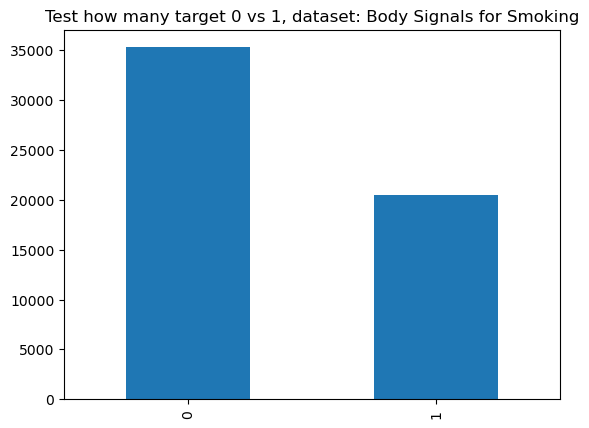

In [32]:
# Seeing if the data is balanced
plt.figure()
df[target_variable].value_counts().plot(kind='bar')
plt.title('Test how many target 0 vs 1, dataset: '+ which_dataset)
plt.show()

In [33]:
# If all columns are continuous, we bin them columns
binned_df = df.copy()
for col in continuous_variables:
    binned_df[col] = standardise(put_in_bins(df[col], 20))
binned_df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,1,-0.514615,-1.174625,-0.450897,-0.037453,0.371038,-0.231923,1,1,-0.773151,...,0.545363,-1.025520,0.23502,-1.295409,-0.069613,-0.03245,-0.324005,1,1,0
1,1,-0.514615,-0.500103,-0.450897,-0.037453,-0.238785,-0.835290,1,1,-0.119802,...,0.545363,-1.025520,0.23502,-1.295409,-0.069613,-0.03245,-0.324005,1,1,0
2,2,0.771969,0.511681,-0.450897,-0.037453,-0.238785,-0.231923,1,1,1.186896,...,0.545363,0.584907,0.23502,0.379202,-0.069613,-0.03245,-0.324005,1,2,1
3,2,-0.514615,0.174420,0.388919,0.842634,0.371038,0.371443,1,1,-1.426500,...,2.309657,0.048098,0.23502,0.379202,-0.069613,-0.03245,-0.324005,1,1,0
4,1,-0.514615,-1.174625,-0.450897,0.402591,-0.238785,-0.231923,1,1,-0.119802,...,0.545363,-1.562329,0.23502,-1.295409,-0.069613,-0.03245,-0.324005,1,2,0


In [34]:
# We standardise original dataset
for cont_col in continuous_variables:
    df[cont_col] = standardise(df[cont_col])
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,1,-0.346517,-1.049465,-0.457476,-0.080484,0.384861,-0.015315,1,1,-0.547989,...,0.269644,-1.101061,-0.215402,-0.838461,-0.422775,-0.259666,-0.257550,1,1,0
1,1,-0.346517,-0.505663,-0.457476,-0.112832,-0.436715,-0.838428,1,1,-0.182381,...,0.294079,-1.228898,-0.215402,-1.289883,-0.216113,-0.259666,-0.436511,1,1,0
2,2,0.896099,0.581943,-0.457476,-0.220659,-0.436715,-0.426872,1,1,1.206928,...,0.880501,0.752585,-0.215402,0.515806,-0.267779,-0.356604,-0.356973,1,2,1
3,2,-0.346517,0.038140,0.322543,0.641955,1.001044,1.013576,1,1,-1.571690,...,2.713072,0.049478,-0.215402,0.515806,-0.371110,-0.033477,-0.436511,1,1,0
4,1,-0.346517,-1.049465,-0.457476,0.426302,-0.025927,-0.015315,1,1,-0.109259,...,-0.194607,-1.356736,-0.215402,-1.289883,-0.526106,-0.421230,-0.356973,1,2,0


In [35]:
how_many_iterations = 20 # how many CV folds

# initialising confusion matrices

confusion_matrix = {}
confusion_matrix['not binned'] =  {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}
confusion_matrix['binned'] =  {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}
confusion_matrix['simple'] =   {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}
confusion_matrix['onehot'] =  {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}
confusion_matrix['target'] =   {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}
confusion_matrix['effect'] =  {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}

out_of = size - 4 * size // 5

classifier = 'logistic' 

In [36]:
for iteration in range(how_many_iterations):
    
    # Randomising the CV fold
    randomlist = random.sample(range(0, size),  4 * size// 5)
    not_in_randomlist = list(set(range(0,size)) - set(randomlist))
 
    
    ### PREDICTION WITHOUT CONT COLUMNS ARE NOT BINNED
    
    X, y =  dataset_to_Xandy(df, target_variable)
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['not binned']['00'][iteration] = m0
    confusion_matrix['not binned']['01'][iteration] = m1
    confusion_matrix['not binned']['10'][iteration] = m2
    confusion_matrix['not binned']['11'][iteration] = m3
    confusion_matrix['not binned']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['not binned']['auc'][iteration] = auc
    
    
    ### PREDICTION CONT COLUMNS ARE BINNED
    
    X, y =  dataset_to_Xandy(binned_df, target_variable)
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['binned']['00'][iteration] = m0
    confusion_matrix['binned']['01'][iteration] = m1
    confusion_matrix['binned']['10'][iteration] = m2
    confusion_matrix['binned']['11'][iteration] = m3
    confusion_matrix['binned']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['binned']['auc'][iteration] = auc
    
    
    ### PREDICTION CONT COLUMNS ARE BINNED + SIMPLE ENCODING
    
    labelencoder = ce.OrdinalEncoder(cols=continuous_variables)
    new_df = labelencoder.fit_transform(binned_df)
        
    X,y =  dataset_to_Xandy(new_df, target_variable)    
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['simple']['00'][iteration] = m0
    confusion_matrix['simple']['01'][iteration] = m1
    confusion_matrix['simple']['10'][iteration] = m2
    confusion_matrix['simple']['11'][iteration] = m3
    confusion_matrix['simple']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['simple']['auc'][iteration] = auc
  
    
    
    ### PREDICTION CONT COLUMNS ARE BINNED + ONE HOT ENCODING
    
    encoder = ce.OneHotEncoder(cols=continuous_variables,use_cat_names=True)
    new_df = encoder.fit_transform(binned_df)
        
    X,y =  dataset_to_Xandy(new_df, target_variable)
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['onehot']['00'][iteration] = m0
    confusion_matrix['onehot']['01'][iteration] = m1
    confusion_matrix['onehot']['10'][iteration] = m2
    confusion_matrix['onehot']['11'][iteration] = m3
    confusion_matrix['onehot']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['onehot']['auc'][iteration] = auc
    
    
    
    #### PREDICTION CONT COLUMNS ARE BINNED + EFFECT ENCODING
    
    encoder = ce.sum_coding.SumEncoder(cols=continuous_variables,verbose=False)
    new_df = encoder.fit_transform(binned_df)

    X,y =  dataset_to_Xandy(new_df, target_variable)
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['effect']['00'][iteration] = m0
    confusion_matrix['effect']['01'][iteration] = m1
    confusion_matrix['effect']['10'][iteration] = m2
    confusion_matrix['effect']['11'][iteration] = m3
    confusion_matrix['effect']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['effect']['auc'][iteration] = auc
    
    
    
    ##### PREDICTION CONT COLUMNS ARE BINNED + TARGET ENCODING
    
    TE_encoder = ce.TargetEncoder(cols=continuous_variables)
    new_df = TE_encoder.fit_transform(binned_df, binned_df[target_variable])
        
    X,y =  dataset_to_Xandy(new_df, target_variable)
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['target']['00'][iteration] = m0
    confusion_matrix['target']['01'][iteration] = m1
    confusion_matrix['target']['10'][iteration] = m2
    confusion_matrix['target']['11'][iteration] = m3
    confusion_matrix['target']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['target']['auc'][iteration] = auc

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

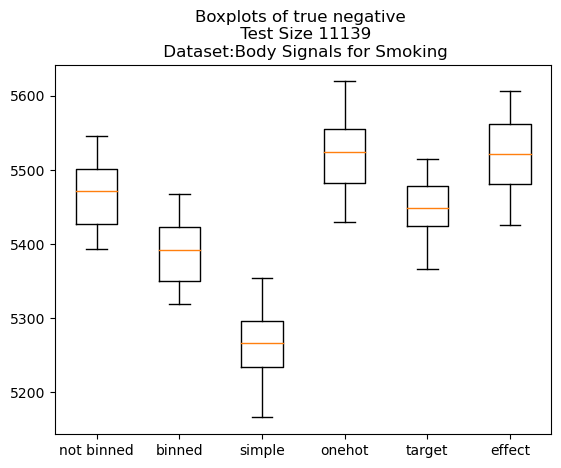

In [37]:
plot_boxplots_confusion(confusion_matrix, '00', which_dataset)

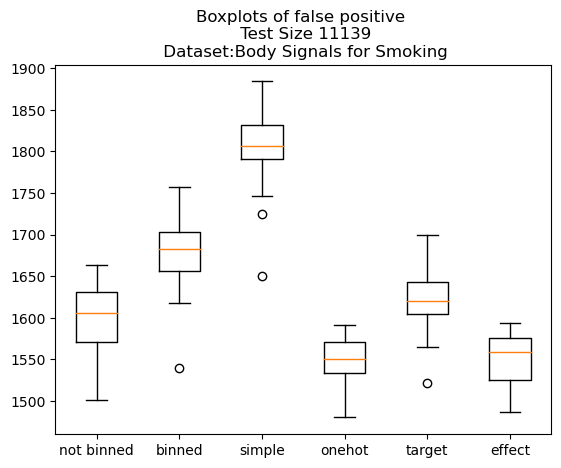

In [38]:
plot_boxplots_confusion(confusion_matrix, '01', which_dataset)

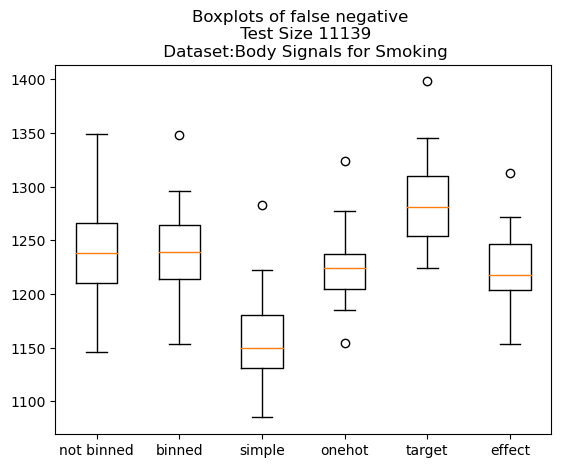

In [39]:
plot_boxplots_confusion(confusion_matrix, '10', which_dataset)

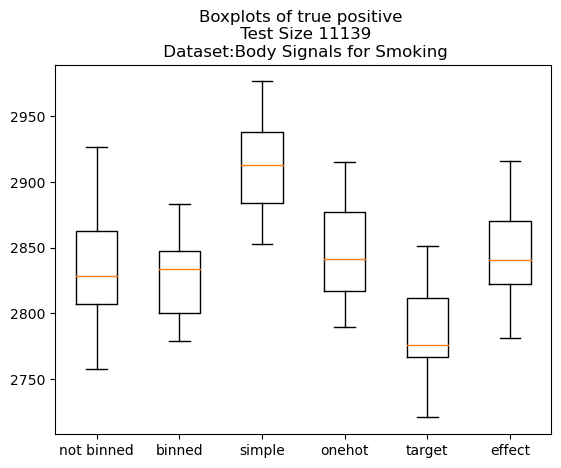

In [40]:
plot_boxplots_confusion(confusion_matrix, '11', which_dataset)

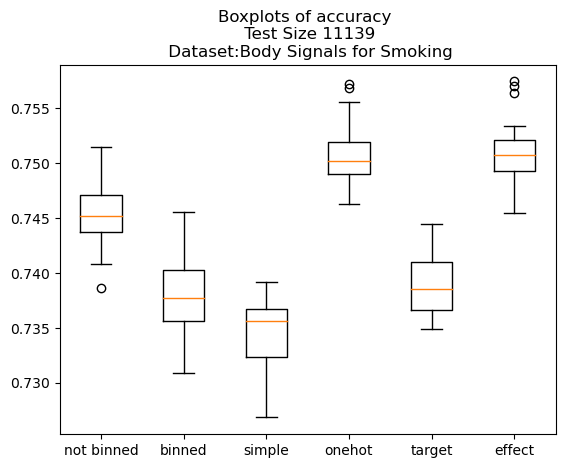

In [41]:
plot_boxplots_confusion(confusion_matrix, 'accuracy', which_dataset)

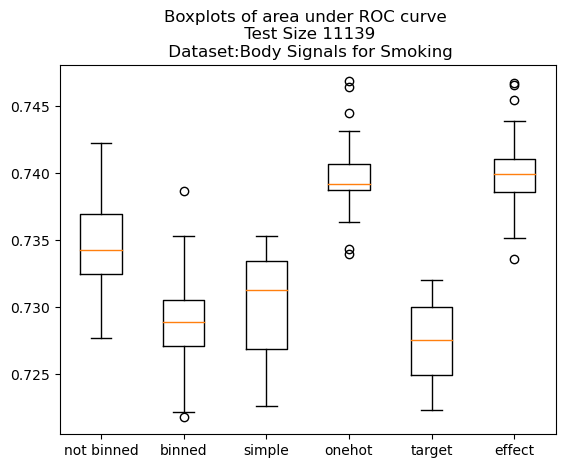

In [42]:
plot_boxplots_confusion(confusion_matrix, 'auc', which_dataset)